# Implementing Basket Analysis

In [11]:
import numpy as numpy
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

## Loading CSV Data

In [12]:
df = pd.read_csv("..\\data\\retail_sales_dataset.csv")
df.head(10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


## Transform Data for Apriori Analysis
We need to create a basket format where each transaction contains the items purchased.

In [13]:
# Create a basket of items purchased per transaction
basket = (df.groupby(['Transaction ID', 'Product Category'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction ID'))

# Convert quantities to binary (1 if purchased >0 else 0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Display the basket
print(basket)

Product Category  Beauty  Clothing  Electronics
Transaction ID                                 
1                      1         0            0
2                      0         1            0
3                      0         0            1
4                      0         1            0
5                      1         0            0
...                  ...       ...          ...
996                    0         1            0
997                    1         0            0
998                    1         0            0
999                    0         0            1
1000                   0         0            1

[1000 rows x 3 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_30968\2336794890.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


## Apply the Apriori Algorithm
Now we can apply the Apriori algorithm to find frequent itemsets.

In [14]:
# Apply Apriori algorithm with a minimum support threshold
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets)

   support       itemsets
0    0.307       (Beauty)
1    0.351     (Clothing)
2    0.342  (Electronics)


c:\Users\User\.conda\envs\mba\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Generate Association Rules
Next, we will generate association rules from the frequent itemsets.

In [15]:
# Generate association rules with a minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the generated rules
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


## Visualize Results 
 visualize some of the results to better understand the associations.

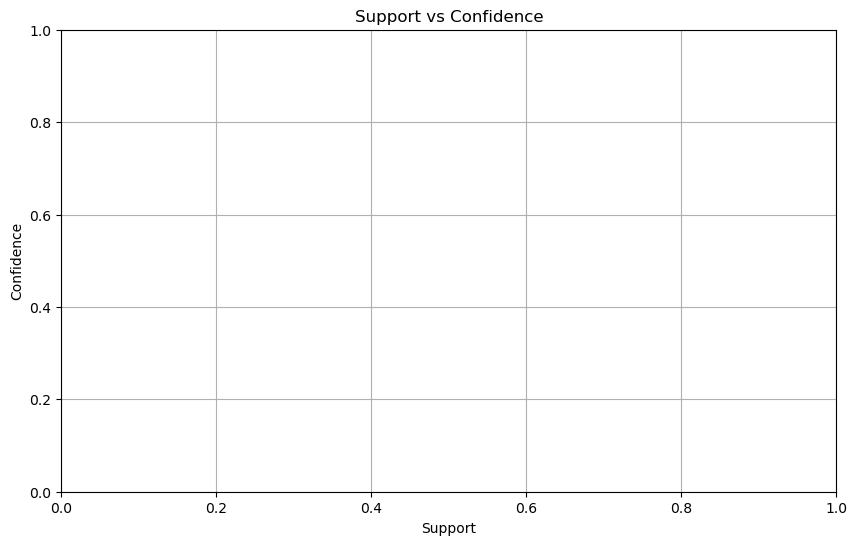

In [16]:

# Visualizing support vs confidence
plt.figure(figsize=(10,6))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', size='lift', sizes=(20,200), alpha=0.6)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

## Conclusion
1.transformed your transaction data into a suitable format for market basket analysis.
2.applied the Apriori algorithm to identify frequent itemsets.
3. generated association rules that show how different product categories are related based on customer purchases.